# Model Comparison - Acceptance

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *
from matplotlib.ticker import ScalarFormatter



Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\Gamma\\"
#Add_on_path = "\\Results\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...
yo = ["0.6","0.7","0.75","0.8","0.83","0.85","0.87","0.9","0.93","0.95","0.97","1.0","1.05","1.1","1.2"]
yo = ["0.6","0.7","0.75","0.8","0.85","0.9","0.95","1.0","1.05","1.1","1.2"] 
#[0.6,0.7,0.75,0.8,0.85,0.9,0.95, 1.0,1.05,1.1,1.2]
#yo = ["1.0","1.05","1.1","1.2"]

In [3]:
def Create_Acceptance_Array_from_Profit(df_Exp_profit,df_RT_profit,GammaRange = ["0.6","0.7","0.75","0.8","0.83","0.85","0.87","0.9","0.93","0.95","0.97","1.0","1.05","1.1","1.2"]
                                       ):
    # Initialize a numpy array of size (number of different forecast accuracies,number of different train sizes, test days, models, result) with empty values
    
    
    Array = np.empty((len(GammaRange),1, 1, 88, 5, 2))
    
    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        SampleSizes = [5] 
        # Assign the month, the day, the model, and each of the 

        # Either acc_1.1_f1_d5_upd72_t73 or f1_d5_upd72_t73
        parts = col.split('_')

        
        # Extract the 'm', 'd', and 't' values from column name
        Gamma = parts[1][0:]
        #print(Gamma)
        Samplesize = int(parts[3][1:])
        f = int(parts[2][1:])
        
        d = int(parts[4][3:])
        t = int(parts[5][1:])

        # Only if the file is part of the specified range then include it.
        if Samplesize in SampleSizes: 
            m = SampleSizes.index(Samplesize)
        if Gamma in GammaRange:
            a = GammaRange.index(Gamma)
            #print(a)

        



        Array[(a),(f-1),(m),(d-1),0,0] = df_Exp_profit[col]['rule']
        Array[(a),(f-1),(m),(d-1),1,0] = df_Exp_profit[col]['det']
        Array[(a),(f-1),(m),(d-1),2,0] = df_Exp_profit[col]['sto']
        Array[(a),(f-1),(m),(d-1),3,0] = df_Exp_profit[col]['feature']
        Array[(a),(f-1),(m),(d-1),4,0] = df_Exp_profit[col]['oracle']

        Array[(a),(f-1),(m),(d-1),0,1] = df_RT_profit[col]['rule']
        Array[(a),(f-1),(m),(d-1),1,1] = df_RT_profit[col]['det']
        Array[(a),(f-1),(m),(d-1),2,1] = df_RT_profit[col]['sto']
        Array[(a),(f-1),(m),(d-1),3,1] = df_RT_profit[col]['feature']
        Array[(a),(f-1),(m),(d-1),4,1] = df_RT_profit[col]['oracle']
        
    return Array

In [4]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
#Array_Acceptance,Array_Bid,Array_comp = Collect_bid_results(current_directory,Add_on_path,1,5,yo)

In [5]:

Array_Profit = Create_Acceptance_Array_from_Profit(df_Exp_Profit,df_RT_Profit,GammaRange=yo)


In [6]:
np.shape(Array_Profit)

(11, 1, 1, 88, 5, 2)

In [7]:
Array_Profit_mean = np.mean(Array_Profit,axis=3)


In [8]:
print(Array_Profit_mean[:,0,0,:,1])

[[1853.21639805 2356.48475424 2120.40682675 2167.32093808 6877.0498741 ]
 [2126.48333221 2704.94944086 2364.65599285 2449.99574303 6877.0498741 ]
 [2249.15555498 2866.68674883 2471.11145468 2572.19282635 6877.0498741 ]
 [2344.75993114 2928.48447789 2497.20163618 2625.26904588 6877.0498741 ]
 [2383.6157203  2969.58615944 2490.99079149 2642.03499196 6877.0498741 ]
 [2244.5488617  2842.53311976 2352.02895132 2491.4991928  6877.0498741 ]
 [1874.60099829 2257.99005725 1953.69983985 2024.869966   6877.0498741 ]
 [ 987.69214667 1018.13539815 1167.32952991 1078.37110578 6877.0498741 ]
 [ 453.28341212  283.58437509  720.93964995  557.5335267  6877.0498741 ]
 [ 309.28645558  124.50788507  600.1206671   424.49774387 6877.0498741 ]
 [ 186.71570523   37.48101783  482.55530816  317.33923497 6877.0498741 ]]


In [9]:
def plot_acceptance_profit(Array_Profit_mean, x=["0.6","0.7","0.75","0.8","0.83","0.85","0.87","0.9","0.93","0.95","0.97","1.0","1.05","1.1","1.2"], save=False):
    name = ["Rule", "Deterministic", "Stochastic", "Feature"]
    model_colors = ['C3', 'C0', 'C2', 'C1', 'C4']
    linestyle = ["-", "-", "-", "-", "--"]

    plt.figure(figsize=(8, 6),dpi=300)

    for m in range(0, len(name)):
        plt.plot(x, Array_Profit_mean[:, 0, 0, m, 1], label=name[m], color=model_colors[m], linestyle=linestyle[m], linewidth=2.5)

    plt.xticks(x)
    plt.xlabel('$\gamma$')
    plt.ylabel('Realized Profit [\u20AC/day]')
    #plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
    #plt.gca().yaxis.set_major_formatter('{x:.2f}')  # Set 2 decimals, adjust as needed
    plt.tick_params(axis='both', which='both', labelsize=14)  # Adjust the fontsize of the axis ticks here
    plt.gca().xaxis.label.set_fontsize(16)  # Adjust the fontsize of the x-axis label here
    plt.gca().yaxis.label.set_fontsize(16)  # Adjust the fontsize of the y-axis label here
    # Set the y-axis tick formatter
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 2))  # Adjust the power limits as needed
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.gca().yaxis.get_offset_text().set_fontsize(16)  # Set the font size
    plt.axvline(x=3.5, ymin=0, ymax=5000, color='black', linestyle='--')  # Add vertical line at x=5
    plt.axvline(x=4.5, ymin=0, ymax=5000, color='black', linestyle='--')  # Add vertical line at x=5
    # Create the legend outside the plot
    plt.legend(loc='lower center', ncol=len(Array_Profit_mean[0, 0, 0, :, 1]), bbox_to_anchor=(0.5, -0.25),
               prop={'size': 16})  # Adjust the fontsize of the legend here

    if save:
        plt.savefig(f'Result_plots/Gamma_Profit_plot.png', format="png", bbox_inches='tight')

    plt.show()


(11, 1, 1, 5, 2)


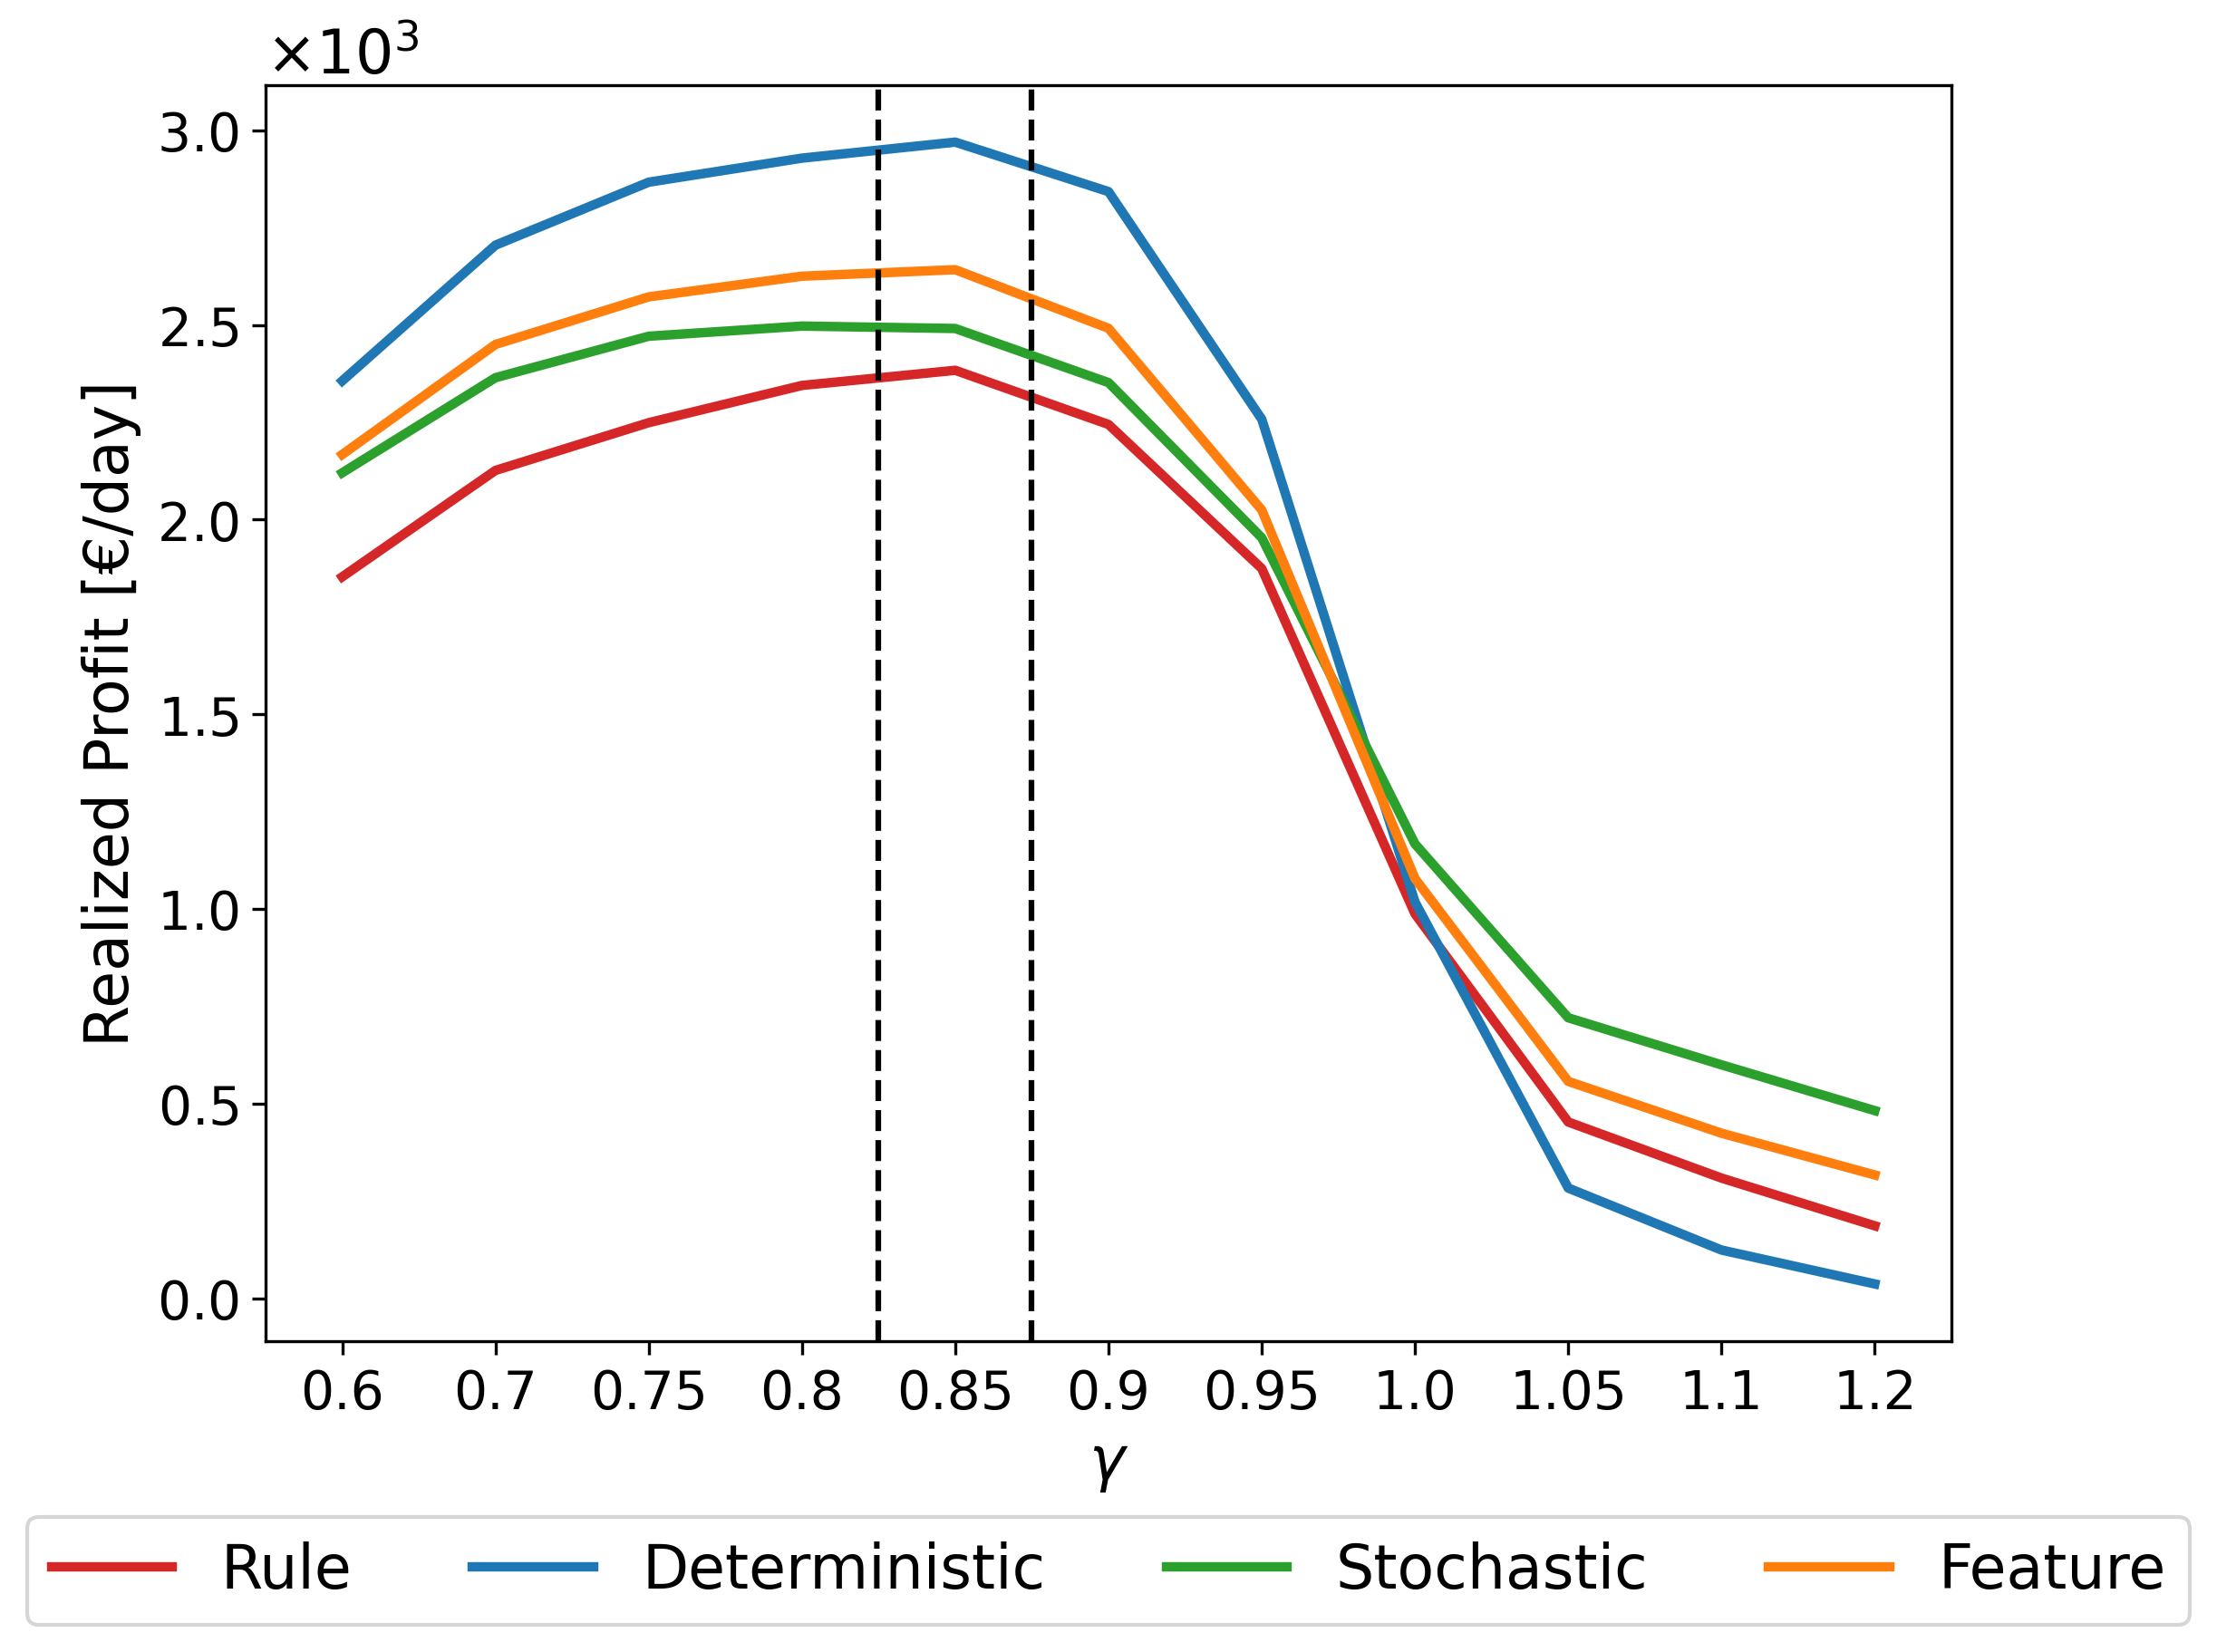

In [10]:

print(np.shape(Array_Profit_mean))
plot_acceptance_profit(Array_Profit_mean,x= yo, save=True)